# 1. Preprocessing

Expected result - information about price and quality of services in different clinics. It'll be: 3 graphics (histograms - prices, reviews and qualifications), statistics and, perhaps,
mustache boxes

In [1]:
!python -m spacy download ru_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 736.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from google.colab import drive
import pandas as pd
import re

import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('ru_core_news_md')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dir_project = '/content/drive/My Drive/Курсы/ТГУ_Аналитика'
dir_data_in = f'{dir_project}/Data/In'
dir_data_out = f'{dir_project}/Data/Out'

In [6]:
city = 'Tomsk'

## 1) download data:

In [7]:
data_price_dental_services = pd.read_csv(f'{dir_data_in}/{city}_price_dental_services.csv', sep='|', header=0)
data_price_dental_services[:2]

,category_name,service_name,service_price_min,service_link
0,-,Аппарат Френкеля,26000,https://prodoctorov.ru/tomsk/uslugi/apparat-fr...
1,-,Плазмолифтинг десен,3000,https://prodoctorov.ru/tomsk/uslugi/plazmolift...


In [8]:
data_dental_clinics = pd.read_csv(f'{dir_data_in}/{city}_dental_clinics.csv', sep='|', header=0)
data_dental_clinics[:2]

,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link
0,Стоматология «Аврора»,4.790000,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/
1,Стоматология «Меджик Клиник»,4.428333,"Томск, ул. Карла Маркса, д. 3",+7 382 270-91-33,6,https://prodoctorov.ru/tomsk/lpu/83954-medzhik...


In [9]:
data_clinics_prices = pd.read_csv(f'{dir_data_in}/{city}_clinics_prices.csv', sep='|', header=0)
data_clinics_prices[:2]

,clinic_name,clinic_link,category_name,service_name,service_price_min,service_link
0,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Кариес,5000,None
1,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Комплексная профессиональная чистка зубов у де...,2500,None


In [10]:
data_clinics_doctors = pd.read_csv(f'{dir_data_in}/{city}_clinics_doctors_info.csv', sep='|', header=0)
data_clinics_doctors[:15]

,clinic_name,clinic_link,id_doctor,doctor_specialization,doctor_experience
0,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,0,Стоматолог-ортопед,28
1,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,1,Стоматолог,10
2,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,2,"Детский стоматолог, стоматолог",13
3,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,3,Стоматолог,38
4,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4,Стоматолог-ортопед,12
5,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,5,"Стоматолог, стоматолог-ортопед",12
6,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,6,Стоматолог-ортопед,11
7,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,7,"Стоматолог-ортопед, стоматолог",7
8,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,8,Стоматолог,11
9,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,9,"Стоматолог-хирург, стоматолог-имплантолог",7


## 2) clean data:

In [11]:
data_price_dental_services.head()

,category_name,service_name,service_price_min,service_link
0,-,Аппарат Френкеля,26000,https://prodoctorov.ru/tomsk/uslugi/apparat-fr...
1,-,Плазмолифтинг десен,3000,https://prodoctorov.ru/tomsk/uslugi/plazmolift...
2,-,Удаление инородного тела из зубного канала,370,https://prodoctorov.ru/tomsk/uslugi/udalenie-i...
3,-,Шинирование зуба,1205,https://prodoctorov.ru/tomsk/uslugi/shinirovan...
4,Лечение зубов,Лечение зубов под наркозом,3500,https://prodoctorov.ru/tomsk/uslugi/lechenie-z...


In [12]:
data_price_dental_services.shape

(113, 4)

In [13]:
data_price_dental_services.isna().sum()

category_name        0
service_name         0
service_price_min    0
service_link         0
dtype: int64

In [14]:
data_price_dental_services['category_name'].value_counts()

Имплантация зубов             20
Хирургическая стоматология    16
Коронки                       11
Брекеты                       10
Лечение зубов                  9
Чистка зубов                   9
Детская стоматология           9
Пародонтология                 6
Исправление прикуса            6
Отбеливание зубов              5
-                              4
Виниры                         3
Рентген зубов                  3
Украшения на зубы              2
Name: category_name, dtype: int64

In [15]:
data_price_dental_services[data_price_dental_services['category_name']=='-'] #.value_counts()

,category_name,service_name,service_price_min,service_link
0,-,Аппарат Френкеля,26000,https://prodoctorov.ru/tomsk/uslugi/apparat-fr...
1,-,Плазмолифтинг десен,3000,https://prodoctorov.ru/tomsk/uslugi/plazmolift...
2,-,Удаление инородного тела из зубного канала,370,https://prodoctorov.ru/tomsk/uslugi/udalenie-i...
3,-,Шинирование зуба,1205,https://prodoctorov.ru/tomsk/uslugi/shinirovan...


In [16]:
data_dental_clinics.head()

,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link
0,Стоматология «Аврора»,4.790000,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/
1,Стоматология «Меджик Клиник»,4.428333,"Томск, ул. Карла Маркса, д. 3",+7 382 270-91-33,6,https://prodoctorov.ru/tomsk/lpu/83954-medzhik...
2,Стоматология «Смайл клиник» на Ленина,5.366667,"Томск, пр. Ленина, д. 186",-,14,https://prodoctorov.ru/tomsk/lpu/65546-smayl-k...
3,Стоматология «Cosmodent» на Иркутском тракте,4.790000,"Томск, Иркутский тракт, 5",+7 382 298-46-44,14,https://prodoctorov.ru/tomsk/lpu/43765-cosmodent/
4,Стоматология «Диамед» на Карташова,4.635000,"Томск, ул. Карташова, д. 23а",+7 382 299-41-70,18,https://prodoctorov.ru/tomsk/lpu/87098-diamed/


In [17]:
data_dental_clinics.isna().sum()

clinic_name       0
clinic_rating     0
clinic_address    0
clinic_phone      0
count_doctors     0
clinic_link       0
dtype: int64

In [18]:
print(len(data_dental_clinics[data_dental_clinics['clinic_rating'] == '-']))
data_dental_clinics[data_dental_clinics['clinic_rating'] == '-']

0


,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link


In [19]:
data_dental_clinics['clinic_rating'] = round(data_dental_clinics['clinic_rating'], 2)
data_dental_clinics[::30]

,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link
0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/
30,Стоматология «Артём»,1.61,"Томск, ул. Интернационалистов, д. 19",+7 961 096-49-57,5,https://prodoctorov.ru/tomsk/lpu/92974-artyom/
60,Стоматология «КонфиДент»,3.54,"Томск, просп. Фрунзе, д. 130",-,7,https://prodoctorov.ru/tomsk/lpu/49976-konfident/
90,Стоматология «Дента Смайл» на Фрунзе,2.60,"Томск, пр-кт Фрунзе, д. 94",-,3,https://prodoctorov.ru/tomsk/lpu/68974-stomato...
120,Стоматология «Ал. Та.»,0.57,"Томск, ул. Елизаровых, д. 18",-,2,https://prodoctorov.ru/tomsk/lpu/31634-al-ta/


In [20]:
print(len(data_dental_clinics[data_dental_clinics['clinic_phone'] == '-']))
data_dental_clinics[data_dental_clinics['clinic_phone'] == '-'][::50]

109


,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link
2,Стоматология «Смайл клиник» на Ленина,5.37,"Томск, пр. Ленина, д. 186",-,14,https://prodoctorov.ru/tomsk/lpu/65546-smayl-k...
84,Стоматология «Реал-Дент»,2.66,"Томск, ул. Никитина, д. 20",-,3,https://prodoctorov.ru/tomsk/lpu/31687-real-dent/
134,Стоматология «Доктор Фаронова»,0.16,"Томск, ул. Елизаровых, д. 6",-,-,https://prodoctorov.ru/tomsk/lpu/83066-doktor-...


In [21]:
print(len(data_dental_clinics[data_dental_clinics['count_doctors'] == '-']))
data_dental_clinics[data_dental_clinics['count_doctors'] == '-'][::15]

22


,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link
98,Стоматология «Галея»,2.29,"Томск, просп. Ленина, д. 126",-,-,https://prodoctorov.ru/tomsk/lpu/13118-galeya-...
135,Стоматология «Здоровье»,0.16,"Томск, пр. Кирова, д. 57",-,-,https://prodoctorov.ru/tomsk/lpu/31663-zdorove/


In [22]:
data_clinics_prices.head(3)

,clinic_name,clinic_link,category_name,service_name,service_price_min,service_link
0,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Кариес,5000,None
1,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Комплексная профессиональная чистка зубов у де...,2500,None
2,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Пульпит молочных зубов,6500,None


In [23]:
data_clinics_prices.isna().sum()

clinic_name          0
clinic_link          0
category_name        0
service_name         0
service_price_min    0
service_link         0
dtype: int64

In [24]:
print(len(data_clinics_prices[data_clinics_prices['category_name'] == '-']))
data_clinics_prices[data_clinics_prices['category_name'] == '-'][:3]

0


,clinic_name,clinic_link,category_name,service_name,service_price_min,service_link


In [25]:
count_null_price = len(data_clinics_prices[data_clinics_prices['service_price_min'] == '-'])
print(count_null_price)
data_clinics_prices[data_clinics_prices['service_price_min'] == '-'][-3:]

344


,clinic_name,clinic_link,category_name,service_name,service_price_min,service_link
1503,Стоматология «Томмедикус»,https://prodoctorov.ru/tomsk/lpu/85539-tommedi...,Шинирование зубов,A16.07.019.002 Временное шинирование при забол...,-,None
1504,Стоматология «Томмедикус»,https://prodoctorov.ru/tomsk/lpu/85539-tommedi...,Шинирование зубов,A16.07.019.003 Временное шинирование при забол...,-,None
1505,Стоматология «Томмедикус»,https://prodoctorov.ru/tomsk/lpu/85539-tommedi...,Шинирование зубов,A16.07.019.003 Временное шинирование при забол...,-,None


In [26]:
count_rows, count_columns = data_clinics_prices.shape
count_rows, count_columns

(1506, 6)

In [27]:
# Price is a required value for research -> need to delete None values:
data_clinics_prices = data_clinics_prices[data_clinics_prices['service_price_min'] != '-']
count_rows_new, count_columns_new = data_clinics_prices.shape
print(count_rows_new == count_rows - count_null_price)
count_rows_new, count_columns_new

True


(1162, 6)

In [28]:
del(data_clinics_prices['service_link'])

In [29]:
data_clinics_prices.head(3)

,clinic_name,clinic_link,category_name,service_name,service_price_min
0,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Кариес,5000
1,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Комплексная профессиональная чистка зубов у де...,2500
2,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,Детская стоматология,Пульпит молочных зубов,6500


In [30]:
data_clinics_doctors.head(3)

,clinic_name,clinic_link,id_doctor,doctor_specialization,doctor_experience
0,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,0,Стоматолог-ортопед,28
1,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,1,Стоматолог,10
2,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,2,"Детский стоматолог, стоматолог",13


In [31]:
data_clinics_doctors.shape

(748, 5)

In [32]:
data_clinics_doctors[data_clinics_doctors['doctor_experience'] == '-']

,clinic_name,clinic_link,id_doctor,doctor_specialization,doctor_experience
19,Стоматология «Меджик Клиник»,https://prodoctorov.ru/tomsk/lpu/83954-medzhik...,4,Стоматолог,-
26,Стоматология «Смайл клиник» на Ленина,https://prodoctorov.ru/tomsk/lpu/65546-smayl-k...,5,Стоматолог,-
163,Стоматология «Денталия» на Лебедева,https://prodoctorov.ru/tomsk/lpu/58830-stomato...,12,Стоматолог,-
176,Медицинский центр «Евродент» на Киевской,https://prodoctorov.ru/tomsk/lpu/31661-evrodent/,12,Стоматолог,-
204,«Медстар» на Набережной реки Ушайки,https://prodoctorov.ru/tomsk/lpu/12944-medstar/,20,-,-
...,...,...,...,...,...
739,Стоматология «Аркада»,https://prodoctorov.ru/tomsk/lpu/69374-arkada/,0,Стоматолог-ортопед,-
742,Стоматология «Альфа Дент»,https://prodoctorov.ru/tomsk/lpu/31636-alfa-dent/,0,Стоматолог,-
745,Стоматология «Мой стоматолог»,https://prodoctorov.ru/tomsk/lpu/92387-moy-sto...,1,Стоматолог-гигиенист,-
746,Стоматология «Мой стоматолог»,https://prodoctorov.ru/tomsk/lpu/92387-moy-sto...,2,Стоматолог,-


In [33]:
data_clinics_doctors = data_clinics_doctors[data_clinics_doctors['doctor_experience'] != '-']
data_clinics_doctors

,clinic_name,clinic_link,id_doctor,doctor_specialization,doctor_experience
0,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,0,Стоматолог-ортопед,28
1,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,1,Стоматолог,10
2,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,2,"Детский стоматолог, стоматолог",13
3,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,3,Стоматолог,38
4,Стоматология «Аврора»,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4,Стоматолог-ортопед,12
...,...,...,...,...,...
738,Стоматология «Ал. Та.»,https://prodoctorov.ru/tomsk/lpu/31634-al-ta/,1,Стоматолог,29
740,Стоматология «Вега-Дент»,https://prodoctorov.ru/tomsk/lpu/96185-vega-dent/,0,"Стоматолог-ортопед, стоматолог, стоматолог-хирург",33
741,Стоматология «Дента Смайл» на Мира,https://prodoctorov.ru/tomsk/lpu/68975-stomato...,0,"Стоматолог, стоматолог-ортопед, стоматолог-хирург",11
743,Стоматология «Тузков дентал»,https://prodoctorov.ru/tomsk/lpu/73307-tuzkov-...,0,"Стоматолог, стоматолог-ортопед, стоматолог-хирург",18


In [34]:
data_clinics_doctors = data_clinics_doctors.astype({'doctor_experience': 'int64'})
data_clinics_doctors.dtypes

clinic_name              object
clinic_link              object
id_doctor                 int64
doctor_specialization    object
doctor_experience         int64
dtype: object

In [35]:
data_doctors_stats = data_clinics_doctors.groupby(by=['clinic_name', 'clinic_link']).agg({'doctor_experience':['min', 'max', 'mean']}).round(2)
data_doctors_stats[:7]

doctor_experience  \
                                                                                                         min   
clinic_name                             clinic_link                                                            
Cтоматология «Анкон»                    https://prodoctorov.ru/tomsk/lpu/12940-ankon-st...                 1   
«Детская стоматология святой Варвары»   https://prodoctorov.ru/tomsk/lpu/89173-detskaya...                 1   
«Мастер Дент» на 19 Гвардейской Дивизии https://prodoctorov.ru/tomsk/lpu/41184-master-d...                 1   
«Мастер Дент» на Герцена                https://prodoctorov.ru/tomsk/lpu/31671-master-d...                 2   
«Мастер Дент» на проспекте Мира         https://prodoctorov.ru/tomsk/lpu/41182-master-d...                 1   
«Мастер Дент» на проспекте Фрунзе       https://prodoctorov.ru/tomsk/lpu/41183-master-d...                 3   
«Медстар» на Иркутском тракте           https://prodoctorov.ru/tomsk/lpu/41185-medstar-...                 1   

                                                                                                \
                                                                                           max   
clinic_name                             clinic_link                                              
Cтоматология «Анкон»                    https://prodoctorov.ru/tomsk/lpu/12940-ankon-st...  42   
«Детская стоматология святой Варвары»   https://prodoctorov.ru/tomsk/lpu/89173-detskaya...  32   
«Мастер Дент» на 19 Гвардейской Дивизии https://prodoctorov.ru/tomsk/lpu/41184-master-d...  19   
«Мастер Дент» на Герцена                https://prodoctorov.ru/tomsk/lpu/31671-master-d...  12   
«Мастер Дент» на проспекте Мира         https://prodoctorov.ru/tomsk/lpu/41182-master-d...  22   
«Мастер Дент» на проспекте Фрунзе       https://prodoctorov.ru/tomsk/lpu/41183-master-d...  27   
«Медстар» на Иркутском тракте           https://prodoctorov.ru/tomsk/lpu/41185-medstar-...  18   

                                                                                                   
                                                                                             mean  
clinic_name                             clinic_link                                                
Cтоматология «Анкон»                    https://prodoctorov.ru/tomsk/lpu/12940-ankon-st...  16.83  
«Детская стоматология святой Варвары»   https://prodoctorov.ru/tomsk/lpu/89173-detskaya...  12.73  
«Мастер Дент» на 19 Гвардейской Дивизии https://prodoctorov.ru/tomsk/lpu/41184-master-d...   7.78  
«Мастер Дент» на Герцена                https://prodoctorov.ru/tomsk/lpu/31671-master-d...   6.22  
«Мастер Дент» на проспекте Мира         https://prodoctorov.ru/tomsk/lpu/41182-master-d...  10.85  
«Мастер Дент» на проспекте Фрунзе       https://prodoctorov.ru/tomsk/lpu/41183-master-d...   8.89  
«Медстар» на Иркутском тракте           https://prodoctorov.ru/tomsk/lpu/41185-medstar-...   9.18

In [36]:
data_doctors_stats.columns = [*data_doctors_stats.columns[:-3], 'doctor_experience_min', 'doctor_experience_max', 'doctor_experience_mean']
data_doctors_stats.head(2)

,,doctor_experience_min,doctor_experience_max,doctor_experience_mean
clinic_name,clinic_link,,,
Cтоматология «Анкон»,https://prodoctorov.ru/tomsk/lpu/12940-ankon-stomatologicheskaya-klinika/,1,42,16.83
«Детская стоматология святой Варвары»,https://prodoctorov.ru/tomsk/lpu/89173-detskaya-stomatologiya-svyatoy-varvary/,1,32,12.73


## 3) join tables

In [37]:
print(data_dental_clinics.shape)
print(data_doctors_stats.shape)

data_dental_clinics_with_doctor_stats = pd.merge(data_dental_clinics, data_doctors_stats, how='left', on=['clinic_name', 'clinic_link'])
print(data_dental_clinics_with_doctor_stats.shape)
data_dental_clinics_with_doctor_stats.head(2)

(143, 6)
(112, 3)
(143, 9)


,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean
0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2
1,Стоматология «Меджик Клиник»,4.43,"Томск, ул. Карла Маркса, д. 3",+7 382 270-91-33,6,https://prodoctorov.ru/tomsk/lpu/83954-medzhik...,2.0,11.0,6.8


In [38]:
# Need to replace None in doctors stats

In [39]:
print(data_dental_clinics_with_doctor_stats.shape)
print(data_clinics_prices.shape)

data_clinics_prices_total = pd.merge(data_dental_clinics_with_doctor_stats, data_clinics_prices, how='right', on=['clinic_name', 'clinic_link'])
print(data_clinics_prices_total.shape)
print(data_clinics_prices_total['clinic_name'].isna().sum())
data_clinics_prices_total.head(2)

(143, 9)
(1162, 5)
(1162, 12)
0


,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min
0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,Детская стоматология,Кариес,5000
1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,Детская стоматология,Комплексная профессиональная чистка зубов у де...,2500


In [40]:
# Save to file
data_clinics_prices_total.to_csv(f'{dir_data_out}/data_clinics_prices_total.csv')

# Analysis

In [41]:
data_clinics_prices_total = pd.read_csv(f'{dir_data_out}/data_clinics_prices_total.csv', header=0)
data_clinics_prices_total.head(2)

,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min
0,0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,Детская стоматология,Кариес,5000
1,1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,Детская стоматология,Комплексная профессиональная чистка зубов у де...,2500


In [42]:
data_clinics_prices_total.shape

(1162, 13)

In [43]:
data_clinics_prices_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1162 non-null   int64  
 1   clinic_name             1162 non-null   object 
 2   clinic_rating           1162 non-null   float64
 3   clinic_address          1162 non-null   object 
 4   clinic_phone            1162 non-null   object 
 5   count_doctors           1162 non-null   int64  
 6   clinic_link             1162 non-null   object 
 7   doctor_experience_min   1162 non-null   float64
 8   doctor_experience_max   1162 non-null   float64
 9   doctor_experience_mean  1162 non-null   float64
 10  category_name           1162 non-null   object 
 11  service_name            1162 non-null   object 
 12  service_price_min       1162 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 118.1+ KB


In [44]:
data_clinics_prices_total.duplicated().sum()

0

In [45]:
data_clinics_prices_total.describe()

,Unnamed: 0,clinic_rating,count_doctors,doctor_experience_min,doctor_experience_max,doctor_experience_mean,service_price_min
count,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,580.500000,4.361867,11.223752,2.598967,22.341652,9.348399,11597.719449
std,335.584813,0.702403,4.484044,2.007548,8.771251,3.740883,37555.666630
min,0.000000,1.610000,5.000000,1.000000,11.000000,4.570000,1.000000
25%,290.250000,3.330000,7.000000,1.000000,13.000000,6.620000,800.000000
50%,580.500000,4.480000,10.000000,3.000000,24.000000,8.000000,3100.000000
75%,870.750000,4.790000,14.000000,5.000000,27.000000,14.430000,9000.000000
max,1161.000000,5.370000,19.000000,29.000000,47.000000,37.800000,531000.000000


In [46]:
list_service_names_unique = list(data_clinics_prices_total['service_name'].unique())
print(len(list_service_names_unique))
list_service_names_unique[-3:]

1026


['Хирургическое Удлинение Зуба', 'Цистэктомия', 'Экструзия Зуба']

In [47]:
# We have a lot of service names, almost 10 times more than the original quantity from the page with prices for services. Most of them are some variants of same services
# So we need to decrease this quantity. # ??? We will use some NLP methods.
print(len(data_price_dental_services), len(list_service_names_unique))

113 1026


In [48]:
# We also cannot use this data due to the frequency of services:
print(data_clinics_prices_total['service_name'].value_counts())

Ортопантомография                                                                                                       4
Радиовизиография челюстно-лицевой области                                                                               3
Снятие ретейнера                                                                                                        3
Диатермокоагуляция при патологии полости рта и зубов                                                                    3
Изготовление диагностической модели                                                                                     3
                                                                                                                       ..
Полировка, коррекция пломбы                                                                                             1
Эстетическое восстановление зуба пломбой с использованием материалов из фотополимеров при среднем и глубоком кариесе    1
Восстановление зуба комп

In [49]:
# Download it to analyse all elements
data_clinics_prices_total['service_name'].value_counts().to_frame().to_csv(f'{dir_data_out}/service_names.csv', encoding='utf-8')

In [50]:
# First we will check quantity of service categories:
list_categories_names_unique = list(data_clinics_prices_total['category_name'].unique())
print(len(list_categories_names_unique))
print(list_categories_names_unique)
list_categories_names_unique[40:50]

127
['Детская стоматология', 'Диагностика', 'Имплантация', 'Лечение зубов', 'Пародонтология', 'Протезирование', 'Профилактика и гигиена', 'Удаление зубов', 'Хирургия', '02 - Общие манипуляции', '03 - Терапия', '04 - Профилактика кариеса', '05.1 - Хирургия - Установка ортодонтического винта', '05 - Хирургия', '06.0 - Имплантология - Внутрикостная дентальная имплантация', '06.1 - Имплантология - Гингивотомия (использование формирователя десны Implantium)', '06.2 - Имплантология - Синус-лифтинг открытый', '06.3 - Имплантология - Синус-лифтинг закрытый', '06.4 - Имплантология - Пластика альвеолярного отростка', '07 - Ортопедия', '08.10 - Ортопедия - Изготовление коронки диоксид циркония', '08.11 - Ортопедия - Изготовление и установка бюгельного протеза на атачменах с замковой фиксацией', '08.12 - Ортопедия - Изготовление и установка простого бюгельного протеза из ацеталовой пластмассы', '08.13 - Ортопедия - Изготовление простого бюгельного протеза с кламерной фиксацией', '08.14 - Ортопедия

['12 - Детская стоматология - Лечение кариеса',
 '13 - Детская стоматология - Лечение осложненного кариеса',
 '48 - Услуги по подбору средств личной гигиены (с учетом расходных материалов)',
 'Общие Услуги для всех прайсов',
 'Брекеты',
 'Виниры',
 'Вкладки',
 'Изготовление индв. капп',
 'Коронки, напыление',
 'Коррекция перикоронарита (промывание ,иссечение ,рассечение капюшона)']

In [51]:
list_common_categories_names = list(data_price_dental_services['category_name'].unique())
print(len(list_common_categories_names))
print(list_common_categories_names)

14
['-', 'Лечение зубов', 'Пародонтология', 'Украшения на зубы', 'Чистка зубов', 'Отбеливание зубов', 'Хирургическая стоматология', 'Имплантация зубов', 'Коронки', 'Виниры', 'Брекеты', 'Детская стоматология', 'Рентген зубов', 'Исправление прикуса']


## Prepare columns 'category_name', 'service_name':

### Common info:

In [52]:
def prepare_data_column(list_unique):
  prepared_data = list_unique.copy()
  for i, row in enumerate(prepared_data):
    row = row.lower()
    row = ''.join(''.join(elem) for elem in re.findall(r'.*- ([\w ]+) -.*|.*- ([\w ]+)|\"(.*)\"|(.*)', row)).strip()
    text_in_brackets = ''.join(re.findall(r'\((.+)\)', row))
    row = row.replace(text_in_brackets, '').replace('()', '').strip()
    prepared_data[i] = row

  return prepared_data

def clean_data_row(data_column, list_row_unique, list_row_unique_clean):
  dict_data_clean = {}
  if len(list_row_unique) != len(list_row_unique_clean):
    raise Exception('Length of list_row_unique and list_row_unique_clean are not equal.')
  for (elem, elem_clean) in zip(list_row_unique, list_row_unique_clean):
    dict_data_clean[elem] = elem_clean
  data_column = [dict_data_clean[elem] if elem in dict_data_clean.keys() else elem for elem in data_column]
  # print(len(set(data_column)))

  return data_column

### Prepare columns 'category_name':

In [53]:
list_categories_names_clean = prepare_data_column(list_categories_names_unique)
list_categories_names_clean_unique = sorted(list(set(list_categories_names_clean)))
print('Unique category name in clean values:', len(set(list_categories_names_clean)))
list_categories_names_clean[40:50]

Unique category name in clean values: 94


['детская стоматология',
 'детская стоматология',
 'услуги по подбору средств личной гигиены',
 'общие услуги для всех прайсов',
 'брекеты',
 'виниры',
 'вкладки',
 'изготовление индв. капп',
 'коронки, напыление',
 'коррекция перикоронарита']

In [54]:
data_clinics_prices_total['category_name'] = clean_data_row(data_clinics_prices_total['category_name'], list_categories_names_unique, list_categories_names_clean)
data_clinics_prices_total[:3]

,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min
0,0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Кариес,5000
1,1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Комплексная профессиональная чистка зубов у де...,2500
2,2,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Пульпит молочных зубов,6500


In [55]:
# Download it to analyse all elements
with open(f'{dir_data_out}/list_categories_names_clean_unique.csv', 'w', encoding='utf-8') as f:
  f.writelines('\n'.join(list_categories_names_clean_unique))

### Prepare columns 'service_name':

In [56]:
list_services_names_clean = prepare_data_column(list_service_names_unique)
list_services_names_clean_unique = sorted(list(set(list_services_names_clean)))
print('Unique category name in clean values:', len(set(list_services_names_clean)))
list_services_names_clean[40:50]

Unique category name in clean values: 915


['стоматологом',
 'стоматолога',
 'стоматолога',
 'прием  врача-стоматолога комплексный',
 'профессиональное отбеливание зубов',
 'радиовизиография челюстно-лицевой области',
 'снятие оттиска с одной челюсти',
 'фиксация скайса',
 'фрагментарная дентальная 3д кт',
 'восстановление депульпированного зуба жевательной группы']

In [57]:
list_common_services = list(data_price_dental_services['service_name'])
print(list_common_services)

['Аппарат Френкеля', 'Плазмолифтинг десен', 'Удаление инородного тела из зубного канала', 'Шинирование зуба', 'Лечение зубов под наркозом', 'Лечение каналов', 'Лечение кариеса', 'Лечение кариеса ICON', 'Лечение пульпита', 'Наращивание зубов', 'Реставрация зубов', 'Удаление старой пломбы', 'Шлифовка/полировка зубов', 'Кюретаж пародонтального кармана', 'Лечение гингивита', 'Лечение пародонтита', 'Лечение пародонтоза', 'Лечение периодонтита', 'Лечение периостита', 'Скайсы на зубы', 'Стразы на зубах', 'Герметизация фиссур у взрослых', 'Гигиеническая чистка зубов', 'Покрытие зуба защитным лаком', 'Покрытие зубов фторлаком', 'Снятие зубных отложений', 'Удаление зубного камня', 'Фторирование зубов', 'Чистка зубов Air Flow', 'Чистка зубов ультразвуком', 'Лазерное отбеливание зубов', 'Отбеливание зубов Amazing White', 'Отбеливание зубов Opalescence', 'Отбеливание зубов ZOOM', 'Фотоотбеливание зубов', 'Вестибулопластика', 'Гемисекция зуба', 'Гингивопластика', 'Гингивэктомия', 'Иссечение капюшона

In [58]:
len(list_common_services)

113

In [59]:
def get_value_from_common_list(data_cell, list_common):
  # print(data_cell)
  # print(list_common)
  is_cell_include_list_common = True
  for common_line in list_common:
    # print('common_line:', common_line)
    for i, common_word in enumerate(common_line.split()):
      # print('word:', common_word)
      if common_word.lower() in data_cell:
        is_cell_include_list_common = True
        if i == len(common_line) - 1:
          break
      else:
        is_cell_include_list_common = False
        break
    if is_cell_include_list_common:
      break

  # if is_cell_include_list_common:
    # print(data_cell, '---', common_line)

  return common_line if is_cell_include_list_common else None

data_clinics_prices_total['service_name_common'] = data_clinics_prices_total['service_name'].apply(get_value_from_common_list, args=([list_common_services]))
# print(data_clinics_prices_total.shape)
# print(data_clinics_prices_total[data_clinics_prices_total['service_name_common'] != None].shape)
print(data_clinics_prices_total['service_name_common'].isna().sum())
data_new = data_clinics_prices_total[data_clinics_prices_total['service_name_common'].isna()]
data_new.head(2)

1140


,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common
0,0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Кариес,5000,None
1,1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Комплексная профессиональная чистка зубов у де...,2500,None


In [60]:
# There are a lot of None values. So we need to prepare list_common_services too
# Alternatively, we can take words that are not nouns or adjective and lemmatize the remaining ones. The same will need to be done with the column list_common_services

In [61]:
is_noun = lambda pos: pos[:2] == 'NN'
is_adjective = lambda pos: pos[:2] == 'JJ'

words = [[(word, pos) for (word, pos) in nltk.pos_tag(nltk.word_tokenize(common_service)) if is_noun(pos) or is_adjective(pos)] for common_service in list_common_services][:3]
words

# Nlkt not russian language or it's required other corpus

[[('Аппарат', 'NN'), ('Френкеля', 'NN')],
 [('Плазмолифтинг', 'NN'), ('десен', 'NN')],
 [('Удаление', 'JJ'),
  ('инородного', 'NNP'),
  ('тела', 'NNP'),
  ('из', 'NNP'),
  ('зубного', 'NNP'),
  ('канала', 'NN')]]

In [62]:
noun = 'NOUN'
adjective = 'ADJ'

words = [[(token.lemma_, token.pos_) for token in nlp(common_service) if token.pos_ in [noun, adjective]] for common_service in list_common_services[:3]]
print(words)
# Spacy works well

[[('аппарат', 'NOUN')], [('плазмолифтинг', 'NOUN'), ('десна', 'NOUN')], [('удаление', 'NOUN'), ('инородный', 'ADJ'), ('тело', 'NOUN'), ('зубной', 'ADJ'), ('канал', 'NOUN')]]


In [63]:
def get_list_noun_adjective(list_in):
  list_out = [' '.join([token.lemma_ for token in nlp(line) if token.pos_ in [noun, adjective]]) for line in list_in]
  # list_out = list(set(list_out))
  # list_out.remove('')

  return list_out

# def get_list_noun_adjective(list_in):
#   list_out = []
#   for line in list_in:
#     list_current = []
#     for token in nlp(line):
#       if token.pos_ in [noun, adjective]:
#         list_current = token.lemma_
#     list_out.append(list_current)

#   return list_out

In [64]:
list_common_services_unique = list(set(get_list_noun_adjective(list_common_services)))
print(len(list_common_services_unique))
print(list_common_services_unique)

94
['', 'временной коронка', 'шинирование челюсть', 'экспресс имплантация зуб', 'гемисекция зуб', 'лечение детский кариес', 'чистка зуб', 'удаление старый пломба', 'элайнеры', 'культевая вкладка', 'скайсы зуб', 'снятие брекет - система', 'импланты', 'иссечение капюшон зуб мудрость', 'лечение пародонтита', 'брекет', 'зубной мост', 'лечение пародонтоз', 'реставрация молочный зуб', 'пластик уздечка губа', 'панорамный снимок зуб', 'вестибулопластика', 'удаление импланта зуб', 'лечение периодонтит', 'удаление киста зуб', 'страз зуб', 'лечение кариес', 'безметалловая керамика', 'лечение детский пульпит', 'пластинка выравнивание зуб', 'керамический коронка', 'шинирование зуб', 'сложный удаление зуб', 'люминиры', 'реставрация зуб', 'лечение зуб наркоз', 'лечение молочный зуб', 'лазерный отбеливание зуб', 'синус -', 'металлический брекет', 'лингвальные брекет', 'керамический брекет', 'бюгельный протез', 'кт зубной ряд', 'золотой коронка', 'гингивэктомия', 'лечение периостит', 'удаление зуб мудр

In [65]:
data_clinics_prices_total['service_name'].head(2)

0                                               Кариес
1    Комплексная профессиональная чистка зубов у де...
Name: service_name, dtype: object

In [66]:
data_clinics_prices_total['service_name_noun_adjective'] = get_list_noun_adjective(data_clinics_prices_total['service_name'])
data_clinics_prices_total['service_name_noun_adjective']

0                                                        
1       комплексный профессиональный чистка зуб ребёно...
2                                            молочный зуб
3                                          постоянный зуб
4                                 консультация специалист
                              ...                        
1157                                        хирургический
1158                                        хирургический
1159                              хирургический удлинение
1160                                          цистэктомия
1161                                            экструзия
Name: service_name_noun_adjective, Length: 1162, dtype: object

In [67]:
data_clinics_prices_total.head()

,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective
0,0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Кариес,5000,None,
1,1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Комплексная профессиональная чистка зубов у де...,2500,None,комплексный профессиональный чистка зуб ребёно...
2,2,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Пульпит молочных зубов,6500,None,молочный зуб
3,3,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Пульпит постоянных зубов,10200,None,постоянный зуб
4,4,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,диагностика,Консультация любого специалиста,1,None,консультация специалист


In [68]:
data_clinics_prices_total['service_name_common'] = data_clinics_prices_total['service_name_noun_adjective'].apply(get_value_from_common_list, args=([list_common_services_unique]))
print(data_clinics_prices_total.shape)
print(data_clinics_prices_total[~data_clinics_prices_total['service_name_common'].isna()].shape)
print(data_clinics_prices_total['service_name_common'].isna().sum())
data_new = data_clinics_prices_total[~data_clinics_prices_total['service_name_common'].isna()]
data_new.head(2)

(1162, 15)
(1162, 15)
0


,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective
0,0,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Кариес,5000,,
1,1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Комплексная профессиональная чистка зубов у де...,2500,,комплексный профессиональный чистка зуб ребёно...


In [69]:
# There are still a lot of values that not equal to common. So we need to analyze common and clinic services manually and create a new list of common services

list_clinic_service_noun_adjective_unique = sorted(list(set(list(data_clinics_prices_total['service_name_noun_adjective']))))
list_common_services_unique = sorted(list_common_services_unique)

with open(f'{dir_data_out}/list_clinic_service_noun_adjective_unique.csv', 'w', encoding='utf-8') as f:
  f.writelines('\n'.join(list_clinic_service_noun_adjective_unique))

with open(f'{dir_data_out}/list_common_services_unique.csv', 'w', encoding='utf-8') as f:
  f.writelines('\n'.join(list_common_services_unique))

In [70]:
list_from_common_services_unique = ['аппарат', 'керамика', 'брекет', 'протез', 'вестибулопластика', 'временной коронка', 'гемисекция зуб', 'герметизация взрослый', 'герметизация ребёнок', 'чистка зуб', 'гингивопластика', 'гингивэктомия', 'золотой коронка', 'зубной мост', 'имплант', 'исправление прикус ребёнок', 'иссечение капюшон зуб мудрость', 'капа выравнивание зуб', 'керамический брекет', 'керамический виниры', 'керамический коронка', 'композитный виниры', 'коронка диоксид цирконий', 'кт зубной ряд', 'культевая вкладка', 'кюретаж пародонтального карман', 'отбеливание зуб', 'лечение альвеолита', 'лечение гингивита', 'лечение детский кариес', 'лечение детский пульпит', 'лечение зуб наркоз', 'лечение канал', 'лечение кариес', 'лечение молочный зуб', 'лечение пародонтита', 'лечение пародонтоз', 'лечение периодонтит', 'лечение периостит', 'лечение пульпит', 'лингвальные брекет', 'люминиры', 'металлический брекет', 'металлокерамический коронка', 'наращивание зуб', 'отбеливание зуб', 'панорамный снимок зуб', 'плазмолифтинг десна', 'пластик уздечка губа', 'пластик уздечка язык', 'пластинка выравнивание зуб', 'пластмассовый коронка', 'пломбирование молочный зуб', 'покрытие зуб защитный лак', 'покрытие зуб фторлаком', 'прозрачный брекет', 'резекция верхушка корень зуб', 'реставрация зуб', 'реставрация молочный зуб', 'ретейнеры', 'сапфировый брекет', 'серебрение молочный зуб', 'синус', 'скайсы зуб', 'сложный удаление зуб', 'снимок зуб', 'снятие брекет', 'снятие зубной отложение', 'страз зуб', 'трейнеры зуб', 'удаление зуб', 'удаление зубной камень', 'удаление импланта зуб', 'удаление инородный тело зубной канал', 'удаление киста зуб', 'удаление пломба', 'удаление экзостоз', 'фарфоровый коронка', 'фотоотбеливание зуб', 'фторирование зуб', 'чистка зуб', 'чистка зуб ультразвук', 'шинирование зуб', 'шинирование челюсть', 'шлифовка полировка зуб', 'элайнеры']
list_from_clinic_services_unique = ['временной зуб', 'временной пломба', 'отбеливание зуб', 'зуб пломба', 'восстановление зуб', 'шинирование зуб', 'установка искусственого зуб', 'установка коронка', 'ультразвуковой обработка', 'удаление зуб', 'трепанация зуб', 'снятие коронка', 'снятие оттиск', 'ремонт протез', 'коронка зуб временной', 'коронка зуб керамический', 'консультация', 'обработка корневой канал', 'лечение канал']

list_common_services_unique = sorted(list(set(list_from_common_services_unique + list_from_clinic_services_unique)))
print(list_common_services_unique)

['аппарат', 'брекет', 'вестибулопластика', 'восстановление зуб', 'временной зуб', 'временной коронка', 'временной пломба', 'гемисекция зуб', 'герметизация взрослый', 'герметизация ребёнок', 'гингивопластика', 'гингивэктомия', 'золотой коронка', 'зуб пломба', 'зубной мост', 'имплант', 'исправление прикус ребёнок', 'иссечение капюшон зуб мудрость', 'капа выравнивание зуб', 'керамика', 'керамический брекет', 'керамический виниры', 'керамический коронка', 'композитный виниры', 'консультация', 'коронка диоксид цирконий', 'коронка зуб временной', 'коронка зуб керамический', 'кт зубной ряд', 'культевая вкладка', 'кюретаж пародонтального карман', 'лечение альвеолита', 'лечение гингивита', 'лечение детский кариес', 'лечение детский пульпит', 'лечение зуб наркоз', 'лечение канал', 'лечение кариес', 'лечение молочный зуб', 'лечение пародонтита', 'лечение пародонтоз', 'лечение периодонтит', 'лечение периостит', 'лечение пульпит', 'лингвальные брекет', 'люминиры', 'металлический брекет', 'металлоке

In [71]:
# There are similar values: 'удаление зуб', 'удаление зубной камень' -> need to change function get_value_from_common_list or sort list descending
list_common_services_unique = sorted(list_common_services_unique, reverse = True)
print(list_common_services_unique)

['элайнеры', 'шлифовка полировка зуб', 'шинирование челюсть', 'шинирование зуб', 'чистка зуб ультразвук', 'чистка зуб', 'фторирование зуб', 'фотоотбеливание зуб', 'фарфоровый коронка', 'установка коронка', 'установка искусственого зуб', 'ультразвуковой обработка', 'удаление экзостоз', 'удаление пломба', 'удаление киста зуб', 'удаление инородный тело зубной канал', 'удаление импланта зуб', 'удаление зубной камень', 'удаление зуб', 'трепанация зуб', 'трейнеры зуб', 'страз зуб', 'снятие оттиск', 'снятие коронка', 'снятие зубной отложение', 'снятие брекет', 'снимок зуб', 'сложный удаление зуб', 'скайсы зуб', 'синус', 'серебрение молочный зуб', 'сапфировый брекет', 'ретейнеры', 'реставрация молочный зуб', 'реставрация зуб', 'ремонт протез', 'резекция верхушка корень зуб', 'протез', 'прозрачный брекет', 'покрытие зуб фторлаком', 'покрытие зуб защитный лак', 'пломбирование молочный зуб', 'пластмассовый коронка', 'пластинка выравнивание зуб', 'пластик уздечка язык', 'пластик уздечка губа', 'пл

In [72]:
data_clinics_prices_total['service_name_common'] = data_clinics_prices_total['service_name_noun_adjective'].apply(get_value_from_common_list, args=([list_common_services_unique]))
print(data_clinics_prices_total.shape)
print(data_clinics_prices_total[~data_clinics_prices_total['service_name_common'].isna()].shape)
print(data_clinics_prices_total['service_name_common'].isna().sum())
data_new = data_clinics_prices_total[~data_clinics_prices_total['service_name_common'].isna()]
data_new.head(2)

(1162, 15)
(574, 15)
588


,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective
1,1,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,детская стоматология,Комплексная профессиональная чистка зубов у де...,2500,чистка зуб,комплексный профессиональный чистка зуб ребёно...
4,4,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,диагностика,Консультация любого специалиста,1,консультация,консультация специалист


In [73]:
# We lost about 50% value. So we need to return to main purpose - obtaining price statistics for dental restoration
print(sorted(list(set(data_clinics_prices_total[data_clinics_prices_total['service_name_common'].isna()]['service_name_noun_adjective']))))

['', '3d сканирование ротовой полость', 'lm - активатор', 'адаптационный приём', 'адаптивный приём', 'анестезия дополнительный инфильтрационный', 'аппликационный', 'аппликационный анестезия', 'аппликация лекарственный препарат слизистый оболочка полость рот', 'аппликация лекарственный препарат слизистый оболочка полость рот десны', 'аппликация лекарственный препарат слизистый оболочка полость рот лечение заболевание слизистая', 'аппликация лекарственный препарат слизистый оболочка полость рот обработка слизистый полость рот антисептик', 'аппликация лекарственный препарат слизистый оболочка полость рот число анестетик', 'аппликация лечебный препарат полость рот процедура', 'аутотрансплантация ветвь нижний челюсть', 'аутотрасплантация зуб пересадка зуб зона отсутсующего зуб единица', 'ацеталовый кламмер', 'введение лекарственный препарат пародонтальный карман', 'введение лекарственный препарат пародонтальный карман медикаментозный обработка зубодесневой карман', 'введение лекарственный с

In [74]:
# In first view there isn't something important so we can delete it:
data_clinics_prices_total = data_clinics_prices_total[~data_clinics_prices_total['service_name_common'].isna()]
data_clinics_prices_total[:-1].tail(3)

# TODO: service_name_common_noun_adjective	service_name_noun_adjective - need to delete 1 of column

,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective
1138,1138,Стоматология «Cosmodent» на Фрунзе,4.79,"Томск, ул. Фрунзе, д. 16",+7 382 298-46-44,10,https://prodoctorov.ru/tomsk/lpu/87778-stomato...,3.0,13.0,8.0,хирургическая стоматология и имплантация,"Первичный прием (осмотр, консультация) врача с...",1200,консультация,первичный приём осмотр консультация врач стома...
1147,1147,Стоматология «Cosmodent» на Фрунзе,4.79,"Томск, ул. Фрунзе, д. 16",+7 382 298-46-44,10,https://prodoctorov.ru/tomsk/lpu/87778-stomato...,3.0,13.0,8.0,хирургическая стоматология и имплантация,Удаление временного зуба,2200,удаление зуб,удаление временной зуб
1149,1149,Стоматология «Cosmodent» на Фрунзе,4.79,"Томск, ул. Фрунзе, д. 16",+7 382 298-46-44,10,https://prodoctorov.ru/tomsk/lpu/87778-stomato...,3.0,13.0,8.0,хирургическая стоматология и имплантация,Удаление зуба сложное/ атравматичное с сепарир...,5000,удаление зуб,удаление зуб атравматичное сепарирование зуб


## Get statistics and draw graphs:

In [75]:
# Get statistics:
data_clinics_prices_total.describe()

,Unnamed: 0,clinic_rating,count_doctors,doctor_experience_min,doctor_experience_max,doctor_experience_mean,service_price_min
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,564.393728,4.340958,10.836237,2.560976,22.062718,9.282213,17197.489547
std,323.919099,0.686779,4.534646,1.697635,8.655894,3.597318,49094.417689
min,1.000000,3.330000,6.000000,1.000000,11.000000,4.570000,1.000000
25%,294.750000,3.330000,7.000000,1.000000,13.000000,6.430000,1850.000000
50%,564.500000,4.430000,10.000000,3.000000,24.000000,8.000000,4865.000000
75%,839.000000,4.790000,14.000000,5.000000,27.000000,14.430000,14000.000000
max,1156.000000,5.370000,19.000000,5.000000,38.000000,14.430000,531000.000000


In [76]:
# Get frequency of services:
print(data_clinics_prices_total['service_name_common'].value_counts()[:])

протез                          99
удаление зуб                    44
имплант                         43
лечение кариес                  42
консультация                    32
зуб пломба                      31
обработка корневой канал        29
восстановление зуб              28
аппарат                         17
синус                           15
коронка диоксид цирконий        13
временной зуб                   13
лечение канал                   13
временной пломба                12
брекет                           9
фторирование зуб                 8
отбеливание зуб                  8
коронка зуб временной            8
лечение периодонтит              8
металлокерамический коронка      8
чистка зуб                       8
шинирование зуб                  7
снятие коронка                   7
металлический брекет             6
коронка зуб керамический         6
реставрация зуб                  6
снятие оттиск                    5
пластмассовый коронка            5
ремонт протез       

In [77]:
# Create a list of services related to dental restoration in difficult cases (loss of a natural tooth):
list_restoration_services = ['протез', 'восстановление зуб', 'коронка диоксид цирконий', 'металлокерамический коронка', 'реставрация зуб', 'коронка зуб керамический', 'пластмассовый коронка', 'зубной мост', 'установка коронка', 'установка искусственого зуб']

In [78]:
data_clinics_prices_total['service_name_common']

1               чистка зуб
4             консультация
6                  имплант
7                  имплант
12                  протез
               ...        
1132    лечение альвеолита
1138          консультация
1147          удаление зуб
1149          удаление зуб
1156               имплант
Name: service_name_common, Length: 574, dtype: object

In [79]:
# Groups of dental restoration: протез, коронка, имплант, мост
data_clinics_prices_total['need_graphs'] = False
list_restoration_services_grouped = ['протез', 'коронка', 'имплант', 'мост']
for service in list_restoration_services_grouped:
  data_clinics_prices_total.loc[data_clinics_prices_total['service_name_common'].str.contains(service), 'service_name_common'] = service
  data_clinics_prices_total.loc[data_clinics_prices_total['service_name_common'].str.contains(service), 'need_graphs'] = True

data_clinics_prices_total_for_graphs = data_clinics_prices_total[data_clinics_prices_total['need_graphs'] == True]
print(data_clinics_prices_total_for_graphs.shape)
data_clinics_prices_total_for_graphs.head(3)

(198, 16)


<ipython-input-79-65c4dced2344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clinics_prices_total['need_graphs'] = False


,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective,need_graphs
6,6,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,имплантация,"Дентальная имплантация (Dentium, Ю.Корея)",23000,имплант,дентальный имплантация,True
7,7,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,имплантация,Дентальная имплантация NOBEL (Швейцария),37500,имплант,дентальный имплантация,True
12,12,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.2,пародонтология,Микропротезирование 1 отсутствующего зуба,7700,протез,микропротезирование отсутствующего зуб,True


In [80]:
data_clinics_prices_total_for_graphs.groupby(by=['service_name_common']).agg({'service_price_min':['min', 'max', 'mean']}).round(2)

service_price_min                  
                                  min     max      mean
service_name_common                                    
имплант                          1500  470000  33760.00
коронка                           400   42000  13563.73
мост                             2200    2200   2200.00
протез                            500  531000  47125.83

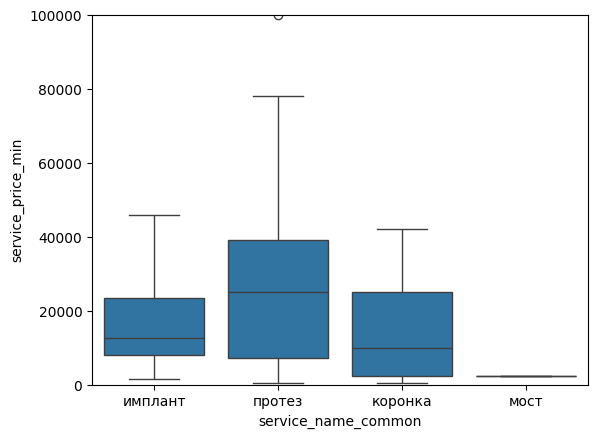

In [81]:
sns.boxplot(x=data_clinics_prices_total_for_graphs['service_name_common'], y=data_clinics_prices_total_for_graphs['service_price_min'])
plt.axis(ymin=0, ymax=100000)
plt.show()

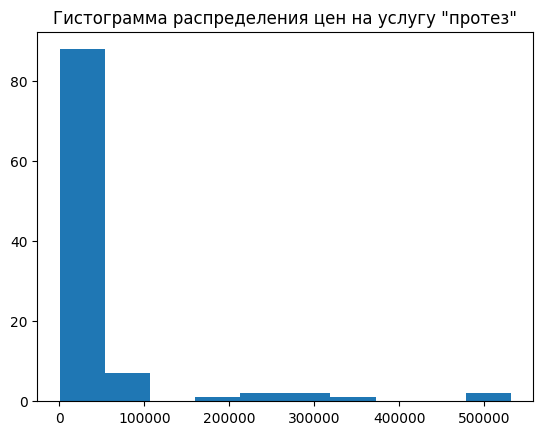

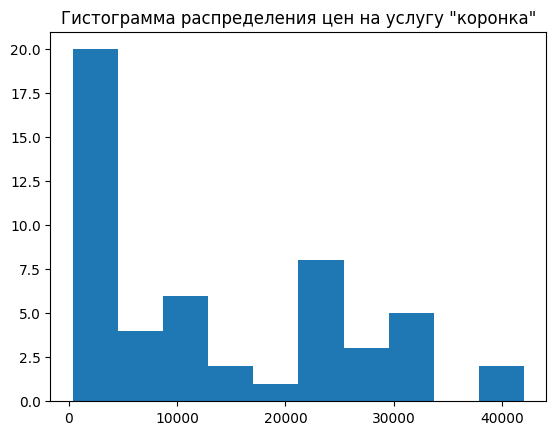

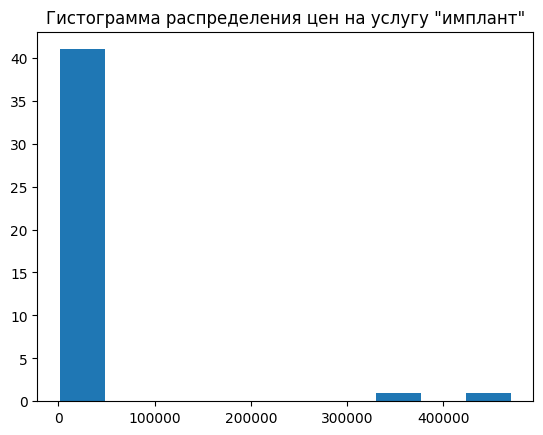

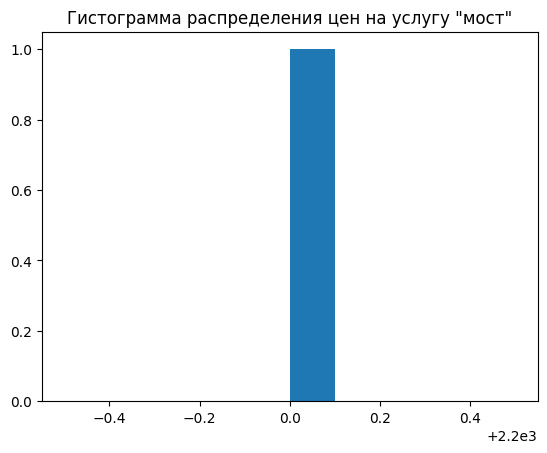

In [82]:
for service in list_restoration_services_grouped:
  count_parts = 10
  bins = range(count_parts)
  plt.hist(data_clinics_prices_total_for_graphs[data_clinics_prices_total_for_graphs['service_name_common'] == service]['service_price_min'], count_parts)
  plt.title(f'Гистограмма распределения цен на услугу "{service}"')
  plt.show()

# TODO: Need to get clinics - axis values for all parts

In [83]:
# Next, we will check the rating of the clinics and the length of service of their employees where the required services are provided:
data_services_stats = data_clinics_prices_total_for_graphs.groupby(by=['service_name_common']).agg({'service_price_min':['min', 'max', 'mean'], 'clinic_rating':['min', 'max', 'mean'], 'doctor_experience_max':['min', 'max', 'mean']}).round(2)
data_services_stats

service_price_min                   clinic_rating        \
                                  min     max      mean           min   max   
service_name_common                                                           
имплант                          1500  470000  33760.00          3.33  5.37   
коронка                           400   42000  13563.73          3.33  5.37   
мост                             2200    2200   2200.00          3.33  3.33   
протез                            500  531000  47125.83          3.33  5.37   

                          doctor_experience_max               
                     mean                   min   max   mean  
service_name_common                                           
имплант              4.25                  11.0  38.0  22.63  
коронка              4.32                  11.0  35.0  18.08  
мост                 3.33                  27.0  27.0  27.00  
протез               4.30                  11.0  38.0  21.35

In [84]:
k_price_importance = 1
k_review_importance = 1
k_experience_importance = 1
service = 'имплант'

In [85]:
# price_max = 50000
# price = 20000
# price_min = 20000

# price_max / price / (price_max / price_min)

In [86]:
# Obtaining a comprehensive rating of clinics for the provision of certain services:
# wrong - we need to get max k for low price: k_complex = (k_price_importance * price / price_max + k_review_importance * review / review_max + k_experience_importance * experience / experience_max) / 3
# k_complex = (k_price_importance * price_max / price / (price_max / price_min) + k_review_importance * review / review_max + k_experience_importance * experience / experience_max) / 3


In [87]:
def add_k_complex_column(df, service_name, k_price_importance, k_review_importance, k_experience_importance):
  df_certain_service = df[df['service_name_common'] == service]
  df_services_stats = df_certain_service.groupby(by=['service_name_common']).agg({'service_price_min':['min', 'max', 'mean'], 'clinic_rating':['min', 'max', 'mean'], 'doctor_experience_max':['min', 'max', 'mean']}).round(2)
  # df_certain_service['k_complex'] = (k_price_importance * df_certain_service['service_price_min'] / df_services_stats['service_price_min']['max'][service] + k_review_importance * df_certain_service['clinic_rating'] / df_services_stats['clinic_rating']['max'][service] + k_experience_importance * df_certain_service['doctor_experience_max'] / df_services_stats['doctor_experience_max']['max'][service]) / 3
  df_certain_service['k_complex'] = (k_price_importance * df_services_stats['service_price_min']['max'][service] / df_certain_service['service_price_min'] / (df_services_stats['service_price_min']['max'][service] / df_services_stats['service_price_min']['min'][service]) + k_review_importance * df_certain_service['clinic_rating'] / df_services_stats['clinic_rating']['max'][service] + k_experience_importance * df_certain_service['doctor_experience_max'] / df_services_stats['doctor_experience_max']['max'][service]) / 3
  df_certain_service.sort_values(by=['k_complex'], ascending = False, inplace=True)
  df_certain_service['k_complex'] = round(df_certain_service['k_complex'], 3)

  print('Number of clinics providing the required service:', len(df_certain_service))

  return df_certain_service

data_clinics_certain_service = add_k_complex_column(data_clinics_prices_total, service, k_price_importance, k_review_importance, k_experience_importance)
data_clinics_certain_service

Number of clinics providing the required service: 43


<ipython-input-87-94918ac7a9c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_certain_service['k_complex'] = (k_price_importance * df_services_stats['service_price_min']['max'][service] / df_certain_service['service_price_min'] / (df_services_stats['service_price_min']['max'][service] / df_services_stats['service_price_min']['min'][service]) + k_review_importance * df_certain_service['clinic_rating'] / df_services_stats['clinic_rating']['max'][service] + k_experience_importance * df_certain_service['doctor_experience_max'] / df_services_stats['doctor_experience_max']['max'][service]) / 3
<ipython-input-87-94918ac7a9c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective,need_graphs,k_complex
591,591,Стоматология «Миродент» на Солнечной,4.48,"Томск, пос. Зональная станция, ул. Солнечная, ...",+7 382 228-31-04,14,https://prodoctorov.ru/tomsk/lpu/63116-mirodent/,1.0,11.0,4.57,6. гигиена,Гигиеническая чистка перед операцией по имплан...,1500,имплант,гигиенический чистка операция имплантация челюсть,True,0.708
410,410,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.561.5,12500,имплант,установка миниимпланта,True,0.680
408,408,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.5101.5,12500,имплант,установка миниимпланта,True,0.680
412,412,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.582.5,12500,имплант,установка миниимпланта,True,0.680
411,411,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.581.5,12500,имплант,установка миниимпланта,True,0.680
409,409,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.5102.5,12500,имплант,установка миниимпланта,True,0.680
6,6,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.20,имплантация,"Дентальная имплантация (Dentium, Ю.Корея)",23000,имплант,дентальный имплантация,True,0.652
7,7,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.20,имплантация,Дентальная имплантация NOBEL (Швейцария),37500,имплант,дентальный имплантация,True,0.644
205,205,Стоматология «Dent Help» (ранее «Help»),3.33,"Томск, ул. Учебная, д. 35-Г",+7 960 975-30-77,7,https://prodoctorov.ru/tomsk/lpu/31630-help/,5.0,27.0,14.43,ортопедия,Изготовление хирургического шаблона на 1 имплант,2600,имплант,изготовление хирургический шаблон имплант,True,0.636
897,897,Стоматология «Миродент» на Марины Цветаевой,4.43,"Томск, д. Кисловка, ул. Марины Цветаевой, д. 30",+7 382 228-31-17,13,https://prodoctorov.ru/tomsk/lpu/78691-stomato...,1.0,24.0,6.62,хирургическое лечение и операции,Формирование прикрепленного десневого контура ...,3500,имплант,формирование прикрепленного десневого контур о...,True,0.628


In [88]:
k_price_importance = 0.9
k_review_importance = 0.6
k_experience_importance = 1
service = 'имплант'

data_clinics_certain_service = add_k_complex_column(data_clinics_prices_total, service, k_price_importance, k_review_importance, k_experience_importance)
data_clinics_certain_service

<ipython-input-87-94918ac7a9c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_certain_service['k_complex'] = (k_price_importance * df_services_stats['service_price_min']['max'][service] / df_certain_service['service_price_min'] / (df_services_stats['service_price_min']['max'][service] / df_services_stats['service_price_min']['min'][service]) + k_review_importance * df_certain_service['clinic_rating'] / df_services_stats['clinic_rating']['max'][service] + k_experience_importance * df_certain_service['doctor_experience_max'] / df_services_stats['doctor_experience_max']['max'][service]) / 3
<ipython-input-87-94918ac7a9c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Number of clinics providing the required service: 43


,Unnamed: 0,clinic_name,clinic_rating,clinic_address,clinic_phone,count_doctors,clinic_link,doctor_experience_min,doctor_experience_max,doctor_experience_mean,category_name,service_name,service_price_min,service_name_common,service_name_noun_adjective,need_graphs,k_complex
591,591,Стоматология «Миродент» на Солнечной,4.48,"Томск, пос. Зональная станция, ул. Солнечная, ...",+7 382 228-31-04,14,https://prodoctorov.ru/tomsk/lpu/63116-mirodent/,1.0,11.0,4.57,6. гигиена,Гигиеническая чистка перед операцией по имплан...,1500,имплант,гигиенический чистка операция имплантация челюсть,True,0.563
410,410,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.561.5,12500,имплант,установка миниимпланта,True,0.543
408,408,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.5101.5,12500,имплант,установка миниимпланта,True,0.543
412,412,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.582.5,12500,имплант,установка миниимпланта,True,0.543
411,411,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.581.5,12500,имплант,установка миниимпланта,True,0.543
409,409,Стоматология «Нежность»,5.37,"Томск, ул. Кузнецова, д. 30/1",+7 382 298-41-08,19,https://prodoctorov.ru/tomsk/lpu/13133-nezhnos...,1.0,35.0,10.26,миниимпланты,установка миниимпланта орто. 1.5102.5,12500,имплант,установка миниимпланта,True,0.543
205,205,Стоматология «Dent Help» (ранее «Help»),3.33,"Томск, ул. Учебная, д. 35-Г",+7 960 975-30-77,7,https://prodoctorov.ru/tomsk/lpu/31630-help/,5.0,27.0,14.43,ортопедия,Изготовление хирургического шаблона на 1 имплант,2600,имплант,изготовление хирургический шаблон имплант,True,0.534
6,6,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.20,имплантация,"Дентальная имплантация (Dentium, Ю.Корея)",23000,имплант,дентальный имплантация,True,0.531
7,7,Стоматология «Аврора»,4.79,"Томск, ул. Учебная, д. 26",+7 382 298-46-30,15,https://prodoctorov.ru/tomsk/lpu/83267-avrora/,4.0,38.0,13.20,имплантация,Дентальная имплантация NOBEL (Швейцария),37500,имплант,дентальный имплантация,True,0.524
897,897,Стоматология «Миродент» на Марины Цветаевой,4.43,"Томск, д. Кисловка, ул. Марины Цветаевой, д. 30",+7 382 228-31-17,13,https://prodoctorov.ru/tomsk/lpu/78691-stomato...,1.0,24.0,6.62,хирургическое лечение и операции,Формирование прикрепленного десневого контура ...,3500,имплант,формирование прикрепленного десневого контур о...,True,0.504


In [89]:
# There are some errors in the solution, in particular when combining different services. Therefore, the result must be viewed manually

In [90]:
# Result:
# For service 'имплант' there are 2 clinics with optimal price-quality ratio in Tomsk:
# 1) Стоматология «Нежность» - установка миниимпланта орто. ... - 12500
# 2) Стоматология «Аврора» - Дентальная имплантация - 23000

In [93]:

data_clinics_certain_service.to_csv(f'{dir_data_out}/data_clinics_certain_service.csv')

In [ ]:
# Result:
# 1) We have obtained approximate results because dental services are complex and the total cost is determined by the cost of its components
# 2)

# Мы получили приблизительные результаты, поскольку стоматологические услуги являются комплекными и общая стоимость определяется стоимостью ее составляющих